In [2]:
import numpy as np
import pandas as pd

In [3]:
import re 

In [4]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [5]:
true["Label"] = 1
fake["Label"] = 0

In [6]:
print(true.shape)
print(fake.shape)

(21417, 5)
(23481, 5)


In [7]:
df = pd.concat([true,fake],axis=0,ignore_index = True)

In [8]:
df.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
print(df.shape)

(44898, 5)


In [10]:
y = df['Label']

In [11]:
df.drop('Label',axis = 1)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [13]:
import nltk

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animeshdubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus  =[]
for title in df['title']:
    review = re.sub('[^a-zA-Z]',' ',title)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000 , ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()


In [17]:
X.shape

(44898, 5000)

In [18]:
y.shape

(44898,)

In [19]:
print(cv.get_feature_names_out()[:100])

['abadi' 'abandon' 'abba' 'abc' 'abc news' 'abe' 'abedin' 'abil' 'abl'
 'abort' 'abort law' 'abroad' 'absolut' 'abus' 'academ' 'accept' 'access'
 'accid' 'accident' 'accomplish' 'accord' 'account' 'accus' 'accus trump'
 'acknowledg' 'across' 'across america' 'act' 'act like' 'act terror'
 'action' 'activ' 'activist' 'actor' 'actress' 'actual' 'ad' 'ad video'
 'adam' 'add' 'addit' 'address' 'admin' 'administr' 'admiss' 'admit'
 'admit trump' 'adopt' 'adult' 'advanc' 'advantag' 'advertis' 'advic'
 'advis' 'advisor' 'advisori' 'advoc' 'affair' 'affect' 'afford' 'afghan'
 'afghanistan' 'afraid' 'africa' 'african' 'african american' 'ag' 'age'
 'agenc' 'agenda' 'agent' 'aggress' 'agit' 'ago' 'agre' 'agre trump'
 'agreement' 'ahead' 'ahead elect' 'ahead trump' 'aid' 'aid worker' 'ail'
 'aim' 'air' 'air forc' 'air forc one' 'air strike' 'aircraft' 'airlin'
 'airport' 'akbar' 'al' 'al franken' 'al gore' 'al qaeda' 'al sharpton'
 'al zor' 'alabama' 'alabama senat']


In [20]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [21]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

function for displaying confusion matrix

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

naive_bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy:0.933
Confusion matrix, without normalization
[[4413  257]
 [ 348 3962]]


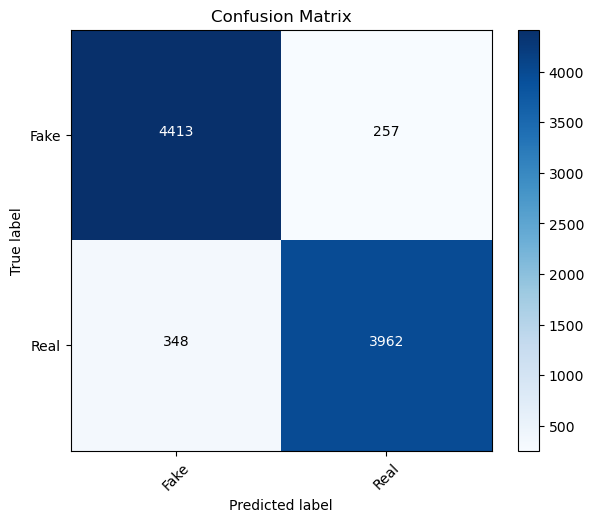

In [25]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test,pred)
print("accuracy:%0.3f"% score)
cm = confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes= ['Fake','Real'])

PassiveAggressiveClassifier

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(X_train,y_train)
pred2 = pac.predict(X_test)

accuracy:0.938
Confusion matrix, without normalization
[[4399  271]
 [ 286 4024]]


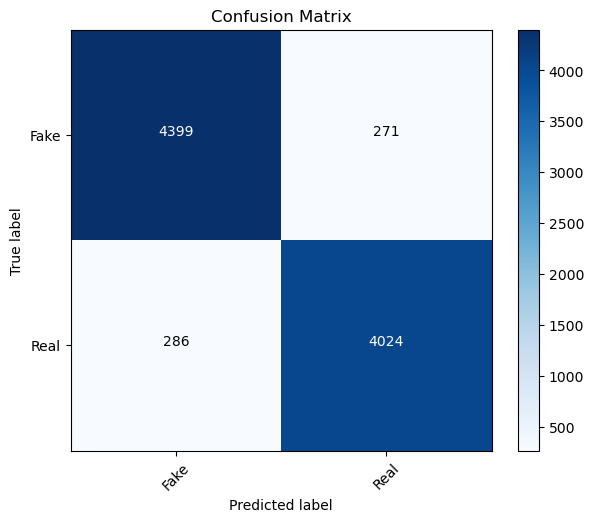

In [27]:
score2 = accuracy_score(y_test,pred2)
print("accuracy:%0.3f"% score2)
cm2 = confusion_matrix(y_test,pred2)
plot_confusion_matrix(cm2,classes= ['Fake','Real'])

naive bayes with hyperparameter tuning

In [28]:
classifier2 = MultinomialNB(alpha = 0.1)
prev_score = 0
for a in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = a)
    sub_classifier.fit(X_train,y_train)
    pred3 = sub_classifier.predict(X_test)
    score3 = accuracy_score(y_test,pred3)
    print("alpha: {},score: {}".format(a,score3))
    if score2 >prev_score:
        prev_score = score3
        classifier2 = sub_classifier

/opt/anaconda3/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


alpha: 0.0,score: 0.5200445434298441
alpha: 0.1,score: 0.933630289532294
alpha: 0.2,score: 0.9338530066815145
alpha: 0.30000000000000004,score: 0.9337416481069042
alpha: 0.4,score: 0.9337416481069042
alpha: 0.5,score: 0.9335189309576838
alpha: 0.6000000000000001,score: 0.9332962138084633
alpha: 0.7000000000000001,score: 0.9329621380846325
alpha: 0.8,score: 0.9330734966592428
alpha: 0.9,score: 0.9329621380846325


In [29]:
feature_names = cv.get_feature_names_out()

In [30]:
pac.coef_[0]

array([ 0.61461189, -2.75408989,  0.44394888, ...,  0.77047165,
        0.07915839,  0.09207747])

these words strongly indicate real news 

In [31]:
sorted(zip(pac.coef_[0],feature_names),reverse = True)[:20]

[(np.float64(5.128442112932342), 'drug war'),
 (np.float64(5.0731057945560085), 'factbox'),
 (np.float64(5.060245855639149), 'malaysia'),
 (np.float64(4.831987065385224), 'lebanes'),
 (np.float64(4.749180384626524), 'envoy'),
 (np.float64(4.657336703812016), 'late night'),
 (np.float64(4.655686527617236), 'tackl'),
 (np.float64(4.563607806654685), 'ny time'),
 (np.float64(4.498751307943565), 'highlight'),
 (np.float64(4.484811493907355), 'deadlin'),
 (np.float64(4.446326391527916), 'myanmar'),
 (np.float64(4.367487194783331), 'czech'),
 (np.float64(4.306784754991186), 'combat'),
 (np.float64(4.1902386980975175), 'clinton call'),
 (np.float64(4.150592687352107), 'uae'),
 (np.float64(4.102441202205613), 'islam state'),
 (np.float64(4.048018045073484), 'compar trump'),
 (np.float64(4.031033348233865), 'australian'),
 (np.float64(4.012781460812033), 'colombia'),
 (np.float64(3.978092117361645), 'bid')]

these words strongly indicate fake news

In [32]:
sorted(zip(pac.coef_[0],feature_names))[:20]

[(np.float64(-6.751091218193312), 'racist'),
 (np.float64(-6.425796401179681), 'forgot'),
 (np.float64(-5.757416504266189), 'trump slam'),
 (np.float64(-5.515382783819692), 'cking'),
 (np.float64(-5.4960016578183915), 'episod'),
 (np.float64(-5.449848191761788), 'russia scandal'),
 (np.float64(-5.124403954638039), 'liter'),
 (np.float64(-5.089787883322131), 'meltdown'),
 (np.float64(-4.880435853127168), 'actual'),
 (np.float64(-4.869359963189669), 'beg'),
 (np.float64(-4.815066593578946), 'amaz'),
 (np.float64(-4.771925485629598), 'hillari'),
 (np.float64(-4.662675604716855), 'gone'),
 (np.float64(-4.655457254445937), 'bold'),
 (np.float64(-4.655085570278215), 'dalla'),
 (np.float64(-4.61148463611812), 'fighter jet'),
 (np.float64(-4.59121923450608), 'us'),
 (np.float64(-4.5872897793775875), 'video'),
 (np.float64(-4.5805496406833015), 'legend'),
 (np.float64(-4.506874096204322), 'bombshel')]

now using text present in the news instead of title of news and also instead of bag of words we are using TFIDF

In [33]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
corpus = []
for text in df['text']:
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000 , ngram_range =(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [35]:
y = df['Label']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [37]:
tfidf.get_feature_names_out()

array(['abadi', 'abandon', 'abba', ..., 'zone', 'zor', 'zuma'],
      dtype=object)

In [38]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

accuracy:0.950
Confusion matrix, without normalization
[[4450  220]
 [ 228 4082]]


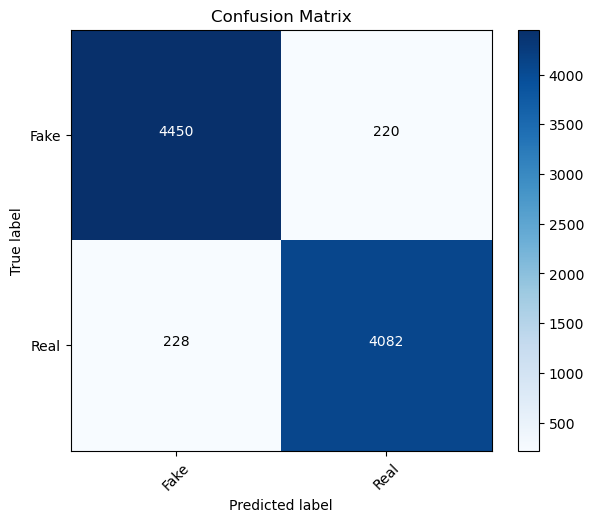

In [39]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test,pred)
print("accuracy:%0.3f"% score)
cm = confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes= ['Fake','Real'])

accuracy:0.995
Confusion matrix, without normalization
[[4648   22]
 [  26 4284]]


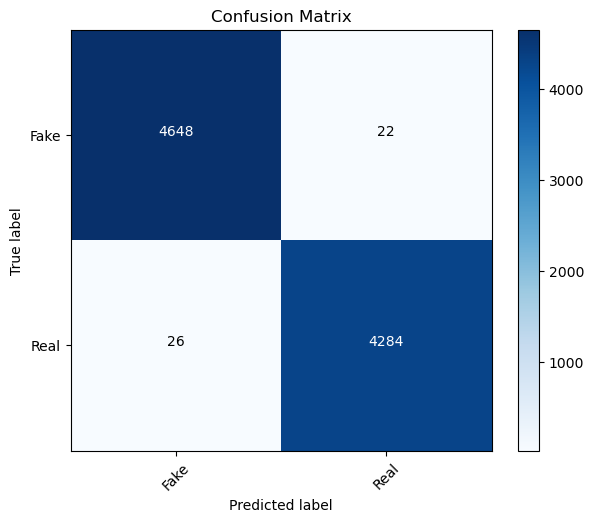

In [40]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(X_train,y_train)
pred2 = pac.predict(X_test)
score2 = accuracy_score(y_test,pred2)
print("accuracy:%0.3f"% score2)
cm2 = confusion_matrix(y_test,pred2)
plot_confusion_matrix(cm2,classes= ['Fake','Real'])

In [41]:
classifier2 = MultinomialNB(alpha = 0.1)
prev_score = 0
for a in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = a)
    sub_classifier.fit(X_train,y_train)
    pred3 = sub_classifier.predict(X_test)
    score3 = accuracy_score(y_test,pred3)
    print("alpha: {},score: {}".format(a,score3))
    if score2 >prev_score:
        prev_score = score3
        classifier2 = sub_classifier

/opt/anaconda3/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


alpha: 0.0,score: 0.5200445434298441
alpha: 0.1,score: 0.9541202672605791
alpha: 0.2,score: 0.9527839643652561
alpha: 0.30000000000000004,score: 0.9521158129175946
alpha: 0.4,score: 0.9520044543429844
alpha: 0.5,score: 0.9516703786191537
alpha: 0.6000000000000001,score: 0.9511135857461025
alpha: 0.7000000000000001,score: 0.9507795100222717
alpha: 0.8,score: 0.950445434298441
alpha: 0.9,score: 0.9502227171492205


In [42]:
feature_names = cv.get_feature_names_out()
pac.coef_[0]


array([ 0.4121047 , -0.4066208 ,  1.5302467 , ..., -0.41600271,
        0.31675747,  1.37037165])

In [43]:
sorted(zip(pac.coef_[0],feature_names),reverse = True)[:20]

[(np.float64(37.08588722251309), 'run'),
 (np.float64(13.993430390532811), 'watch former'),
 (np.float64(9.197807239439339), 'scene'),
 (np.float64(5.974473147003923), 'rush'),
 (np.float64(5.207663099476954), 'prime'),
 (np.float64(5.078737674896057), 'primari'),
 (np.float64(4.712346241517858), 'young'),
 (np.float64(4.712346241517858), 'news confer'),
 (np.float64(4.644630128704563), 'nuclear deal'),
 (np.float64(4.05036090557297), 'water'),
 (np.float64(4.0026848176931), 'next year'),
 (np.float64(3.9766136078530523), 'sanction north korea'),
 (np.float64(3.8015504934566073), 'sec'),
 (np.float64(3.7075603980868235), 'la vega'),
 (np.float64(3.6723972545113854), 'weinstein'),
 (np.float64(3.62831367132456), 'elizabeth warren'),
 (np.float64(3.6154096887570293), 'trump endors'),
 (np.float64(3.582574907981942), 'newsweek'),
 (np.float64(3.554333298510001), 'russia hack'),
 (np.float64(3.487920079943476), 'russia')]

In [44]:
sorted(zip(pac.coef_[0],feature_names))[:20]

[(np.float64(-18.201087223102), 'video show'),
 (np.float64(-9.219862697637174), 'releas video'),
 (np.float64(-6.8724123207691195), 'usa today'),
 (np.float64(-6.858128626287751), 'probe trump'),
 (np.float64(-6.58919180862008), 'gun right'),
 (np.float64(-6.3374807546687), 'shove'),
 (np.float64(-5.602889976973284), 'independ referendum'),
 (np.float64(-5.591135697225226), 'reviv'),
 (np.float64(-5.500402850835251), 'first amend'),
 (np.float64(-5.417528216247262), 'muslim mayor'),
 (np.float64(-4.8053004678837015), 'hot'),
 (np.float64(-4.643376834577054), 'great'),
 (np.float64(-4.6186654164498036), 'wi'),
 (np.float64(-4.3910498534891085), 'everi american'),
 (np.float64(-4.388396191076175), 'great news'),
 (np.float64(-4.298402717332488), 'india'),
 (np.float64(-4.239062427957249), 'everi'),
 (np.float64(-4.226586196993432), 'ann'),
 (np.float64(-4.106887937730236), 'watch hillari'),
 (np.float64(-4.07564007543739), 'break law')]